# Part I - Ford GoBike System Data Exploration
## by Akbarali Mukhammadiev

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, United States.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> The given dataset contains 183412 rows and 16 total columns. Furthermore, it contains information about the duration of each travel in the `duration_sec` column. The information about start and end times of the travel is given in the `start_time` and `end_time` columns respectively. 

> There is also information concerning the start and end stations of travellers around that area. The corresponding information is given by `start_station_id`, `end_station_id`, `start_station_name`, `end_station_name`, `start_station_latitude`, `end_station_latitude` and `start_station_longitude`, `end_station_longitude` columns.

> The columns `user_type`, `member_birth_year`, `member_gender` represent the information regarding the members and users whereas the columns `bike_id` and `bike_share_for_all_trip` are representing the corresponding information regarding bikes.

### What is/are the main feature(s) of interest in your dataset?

> Well, according to the given detailed information regarding the users in the dataset it might be very intersting to explore e.g. who are the most and frequent users of bikes in terms of their gender and age. Moreover the other main features could be to seek answers of the questions such as when are most trips taken in terms of time of day, day of the week, or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer? etc. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Well, I believe that concerning the users the given information in the columns such as `member_gender`, `member_birth_date` would come in handy. Furthermore, for further details I plan to leverage the information about duration of the travel, start and end time information. But I also think the rest of the dataset will also be very useful and helpful for my extended explorations of the dataset.

>Before starting the exploration process it is recommended to wrangle, assess and clean our dataset if necessary. Therefore, let's get started with wrangling process first. Let's first check out if they have correct data types, how many missing values are out there and also check for duplicates .

In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df.duplicated().sum()

0

Before dealing with these missing values, lets also consider our categorical variables e.g. `member_gender`, `user_type`, `bike_share_for_all_trip` etc.

In [8]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [9]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [10]:
df['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [11]:
df.member_birth_year.value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
1992.0     8250
1987.0     8018
1986.0     7973
1994.0     7660
1995.0     7423
1985.0     7028
1984.0     6562
1983.0     5954
1980.0     5024
1982.0     4990
1996.0     4640
1981.0     4345
1979.0     3756
1997.0     3481
1998.0     3208
1978.0     2830
1977.0     2725
1974.0     2633
1999.0     2528
1975.0     2503
1976.0     2442
1973.0     2080
1968.0     1928
1971.0     1924
1972.0     1909
          ...  
1954.0      301
1952.0      189
1951.0      180
1950.0      178
1953.0      158
1947.0      135
1955.0      134
1945.0      105
1949.0       99
1931.0       89
1900.0       53
1948.0       51
2001.0       34
1943.0       30
1942.0       21
1933.0       20
1946.0       19
1902.0       11
1939.0       11
1941.0        9
1901.0        6
1938.0        3
1920.0        3
1934.0        2
1944.0        2
1930.0        1
1910.0        1
1927.0        1
1928.0        1
1878.0        1
Name: member_birth_year,

> Now let's first determine what issues we have. Concerning the data types:
   1. `member_birh_year` column must be integer data type and not float data type. 
   2. `start_station_id` and `end_station_id` columns must be object data types.
   3. `start_time` and `end_time` columns must be datetime data type. 

> Concerning the missing values: 
   1. I will drop missing values in `start_station_id`, `start_station_name` and similarly in `end_station_id`, `end_station_name` columns.
   2. I will drop missing values in `member_birth_year` and `member_gender` columns since there also not too many of them.
   3. I will delete `Other` category in `member_gender` column since they're not useful for my analysis.
   4. I can't see any issue in the `user_type` column.
   5. Since there isn't any duplicates I don't have to drop any of them. 

In [12]:
# Taking first the copy of the original dataset
df_clean = df.copy()

In [13]:
df_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [14]:
df_clean.dropna(subset=['start_station_id', 'start_station_name', 'member_birth_year'], inplace=True)

In [15]:
df_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

> Luckily, there are the station ids and names of start with missing values correspond the stations id and names with missing values. Now, it is time to remove `Other` category from our `member_gender` column since they aren't useful for our analysis.

In [16]:
df_clean.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [17]:
# Changing data types
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('int')
df_clean['start_station_id'] = df_clean['start_station_id'].astype('object')
df_clean['end_station_id'] =df_clean['end_station_id'].astype('object')
df_clean['start_time'] =  pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] =  pd.to_datetime(df_clean['end_time'])                                        

In [18]:
df_clean = df_clean[df_clean['member_gender'] != 'Other'].copy()

In [19]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

> Now, we're ready for data exploration!

## Univariate Exploration

> In this section, we investigate distributions of individual variables.  Let's start our observation with who are the most frequent users of the company in terms of gender and in terms of user types.

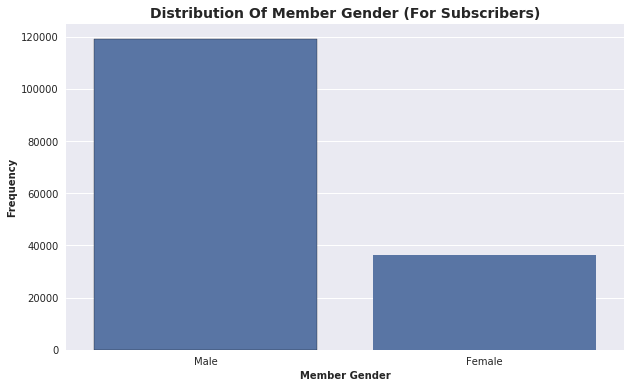

In [20]:
# Setting the color of the plots
base_color = sb.color_palette()[0]

#Let's create a function that can be very useful for the pllots
def myCountPlot(df, xVar, color=base_color, order=None, filter=''):
    plt.figure(figsize=[10, 6]);
    sb.countplot(data=df, x=xVar, edgecolor='black', color=base_color, order=order);
    xVar = xVar.replace('_', ' ');
    plt.title(f'''Distribution of {xVar} (for {filter if filter else 'All Data'})'''.title(), fontsize=14, weight='bold');
    plt.xlabel(xVar.title(), fontsize=10, weight='bold');
    plt.ylabel('Frequency'.title(), fontsize=10, weight='bold');
    
df_1 = df_clean[df_clean['user_type'] == 'Subscriber']
myCountPlot(df_1, 'member_gender', filter='Subscribers')

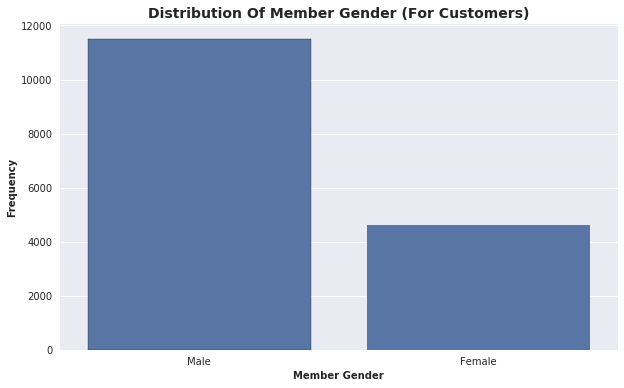

In [21]:
df_1 = df_clean[df_clean['user_type'] == 'Customer']
myCountPlot(df_1, 'member_gender', filter='Customers')

> We can see that there are way more male users than female users and the most of the users are subscribers of the company. Now let's observe the contribution of the gender among the subscribers and non-subscribers.

In [22]:
x_1 = df_clean[(df_clean['member_gender'] == 'Male') & (df_clean['user_type'] == 'Subscriber')].user_type.count()
x_1

119007

In [23]:
y_1 = df_clean[(df_clean['member_gender'] == 'Female') & (df_clean['user_type'] == 'Subscriber')].user_type.count()
y_1

36182

In [24]:
x_2 = df_clean[(df_clean['member_gender'] == 'Male') & (df_clean['user_type'] == 'Customer')].user_type.count()
x_2

11493

In [25]:
y_2 = df_clean[(df_clean['member_gender'] == 'Female') & (df_clean['user_type'] == 'Customer')].user_type.count()
y_2

4623

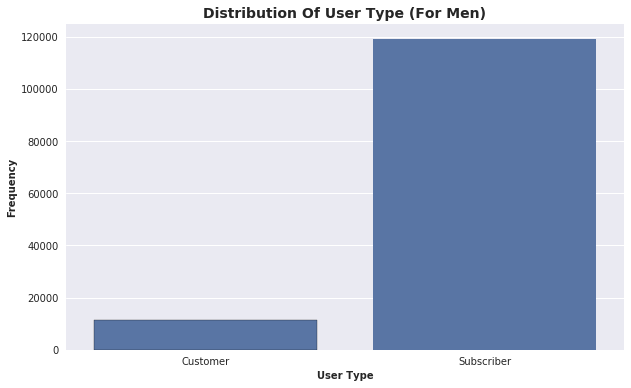

In [26]:
df_1 = df_clean[df_clean['member_gender'] == 'Male']
myCountPlot(df_1, 'user_type', filter='Men')

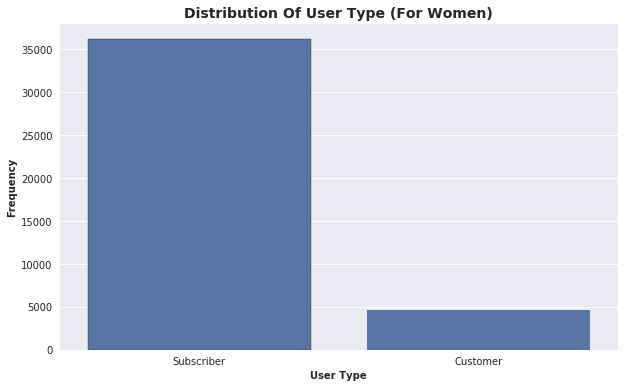

In [27]:
df_1 = df_clean[df_clean['member_gender'] == 'Female']
myCountPlot(df_1, 'user_type', filter='Women')

> We have observed that as it is expected the frequency of the male subscribers and customers are dominant with almost 3 times difference between the two. Now let's us consider `bike_share_for_all_trip` column's plot.

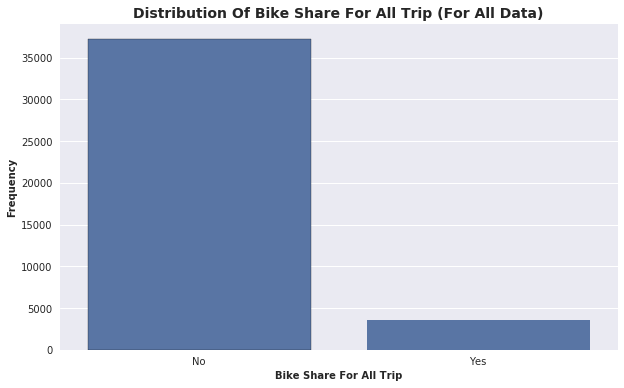

In [28]:
myCountPlot(df_1, 'bike_share_for_all_trip')

> Next, it might also be very interesting to observe data regarding the distribution of ages of the members of the company. Hence, let us first calculate the ages of the customers according to their birth years.

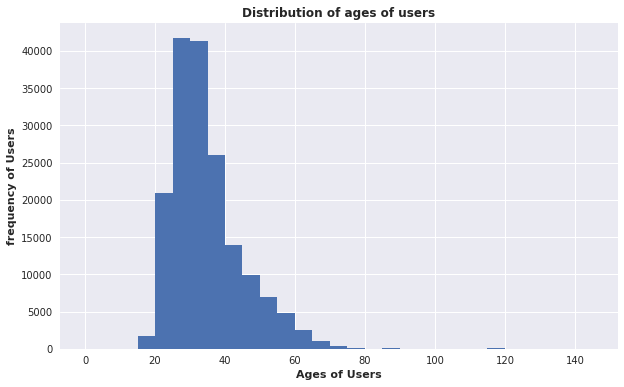

In [29]:
df_clean['ages'] = 2019 - df_clean['member_birth_year']
plt.figure(figsize=[10, 6]);
bins = np.arange(0, df_clean['ages'].max()+5, 5)
plt.hist(df_clean['ages'], bins=bins);
plt.xlabel('Ages of Users', weight='bold');
plt.ylabel('frequency of Users', weight='bold');
plt.title('Distribution of ages of users', weight='bold');

> It can be seen from the plot above that there are some outliers and they should be removed. We can hence take the ages under 80 to make our analysis more reasonable.

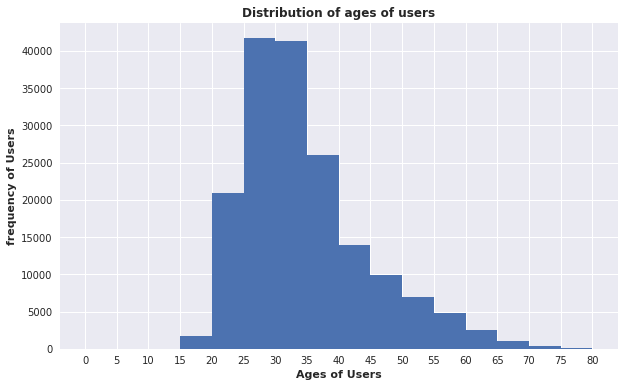

In [30]:
df_clean = df_clean[df_clean['ages'] <= 80]
plt.figure(figsize=[10, 6]);
bins = np.arange(0, df_clean['ages'].max()+5, 5)
plt.hist(data=df_clean, x='ages', bins=bins);
plt.xticks(bins);
plt.xlabel('Ages of Users', weight='bold');
plt.ylabel('frequency of Users', weight='bold');
plt.title('Distribution of ages of users', weight='bold');

> Observing the given plot above, it can be seen that the most of the users correspond to the age range between 20 and 40. Next let's observe the questions concerning time that the when are most trips taken in terms of time of day, day of the week, or month of the year?

> Let's first extract the corresponding dates from the dataset as follows:

In [31]:
df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hour'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_day'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')

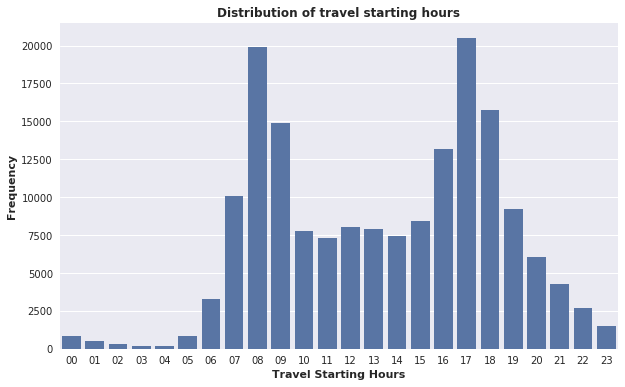

In [32]:
plt.figure(figsize=[10, 6]);
sb.countplot(data=df_clean, x='start_hour', color=base_color);
plt.xlabel('Travel Starting Hours', weight='bold');
plt.ylabel('Frequency', weight='bold');
plt.title('Distribution of travel starting hours', weight='bold');

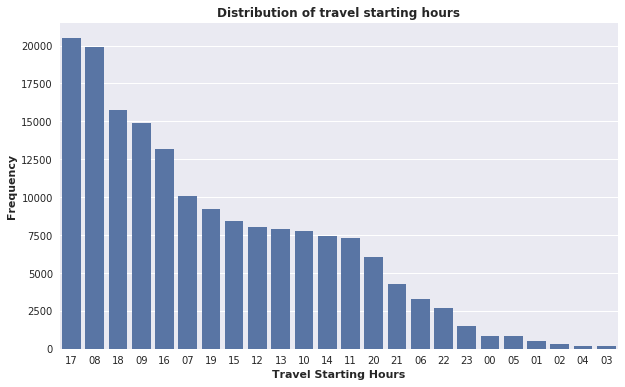

In [33]:
# Ordering by the most frequent hour
plt.figure(figsize=[10, 6]);
type_order = df_clean['start_hour'].value_counts().index
sb.countplot(data=df_clean, x='start_hour', color=base_color, order=type_order);
plt.xlabel('Travel Starting Hours', weight='bold');
plt.ylabel('Frequency', weight='bold');
plt.title('Distribution of travel starting hours', weight='bold');

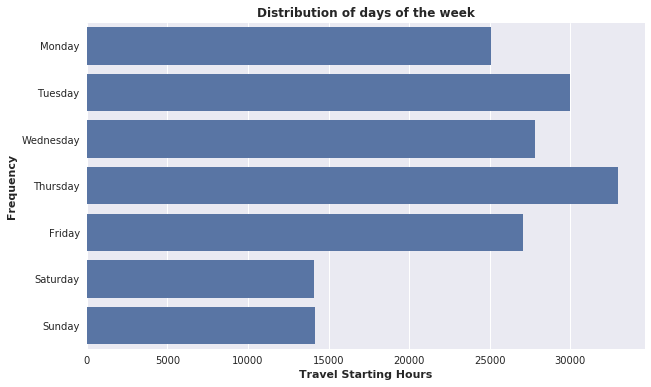

In [34]:
plt.figure(figsize=[10, 6]);
#type_order = df_clean['start_day'].value_counts().index
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=df_clean, y='start_day', color=base_color, order=day_order);
plt.xlabel('Travel Starting Hours', weight='bold');
plt.ylabel('Frequency', weight='bold');
plt.title('Distribution of days of the week', weight='bold');

In [35]:
df_clean.start_month.value_counts()

February    171116
Name: start_month, dtype: int64

> Looking at the charts above, we can see that the most frequent hour of the day is 5:00 pm and the least frequent is after midnight. This is probably due to the fact that everyone returned home from their offices. As it is expected, people used bikes more during the weekdays compared to weekends. The most frequent day is Thursday with above 30000 uses. It must be noted that the given dataset contains only February as a month. Therfore, we can't check the distribution in each month.

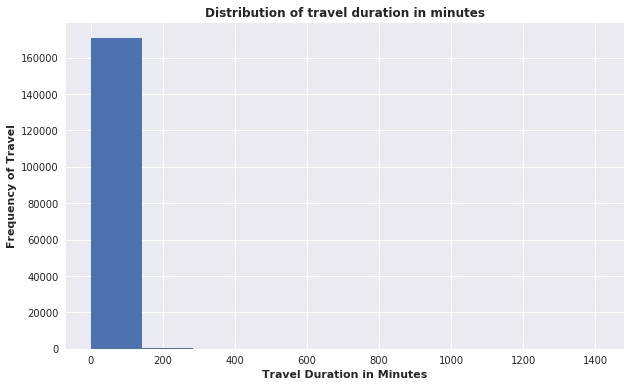

In [36]:
# Let's first convert from seconds to minutes to achieve better idea

plt.figure(figsize=[10, 6]);

# Converting to minutes from seconds
df_clean['duration_min'] = df_clean['duration_sec'] / 60

# Plotting the corresponding data
plt.hist(data=df_clean, x='duration_min');
plt.xlabel('Travel Duration in Minutes', weight='bold');
plt.ylabel('Frequency of Travel', weight='bold');
plt.title('Distribution of travel duration in minutes', weight='bold');

> We can't clearly see the duration of travel distributions. One way to see the clear distributions of the travel duration of users is to scale the data using logarithmic transform. We can accomplish it as follows.

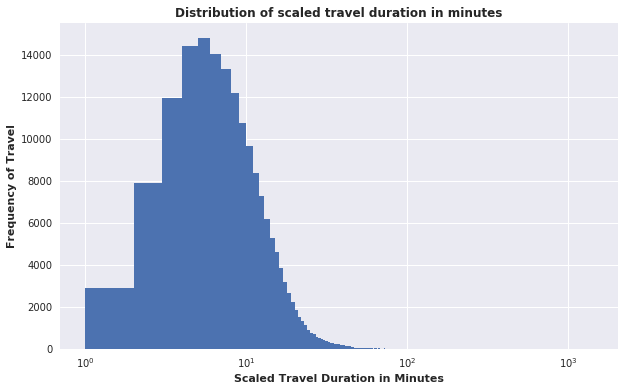

In [37]:
plt.figure(figsize=[10, 6]);
# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, df_clean['duration_min'].max()+1, 1)
plt.hist(data=df_clean, x='duration_min', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# Scaling to log type
plt.xscale('log')
plt.xlabel('Scaled Travel Duration in Minutes', weight='bold');
plt.ylabel('Frequency of Travel', weight='bold');
plt.title('Distribution of scaled travel duration in minutes', weight='bold');

> Now we can see more clearly and can interpret whats happening there. The distribution of travel duration is mostly less than 1 hour long and it is normally distributed around 10 minutes. Now let's remove the outliers that are more than 2 hours.

In [38]:
df_clean = df_clean[df_clean['duration_min'] <= 120]

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170608 entries, 4 to 183411
Data columns (total 22 columns):
duration_sec               170608 non-null int64
start_time                 170608 non-null datetime64[ns]
end_time                   170608 non-null datetime64[ns]
start_station_id           170608 non-null object
start_station_name         170608 non-null object
start_station_latitude     170608 non-null float64
start_station_longitude    170608 non-null float64
end_station_id             170608 non-null object
end_station_name           170608 non-null object
end_station_latitude       170608 non-null float64
end_station_longitude      170608 non-null float64
bike_id                    170608 non-null int64
user_type                  170608 non-null object
member_birth_year          170608 non-null int64
member_gender              170608 non-null object
bike_share_for_all_trip    170608 non-null object
ages                       170608 non-null int64
start_date             

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In this section, I dealt with only univariate data exploration. Observing the data I have found very interesting facts and information. I will share these facts as follows:
   1. There are way more male users than female users and the most of the users are subscribers of the company. 
   2. As it was expected, the contribution of the gender among the subscribers and non-subscribers are similar as above i.e. more men than women have been using the bikes for their travelling.
   3. I have also observed that the frequency of the male subscribers and also the non-subscribers are dominant as well with almost 3 times difference between the two groups.
   5. The most of the bike users correspond to the age range between 20 and 40.
   6. As it is expected that the most frequent hour of the day is 5:00 pm and the least frequent is after midnight. his is probably due to the fact that everyone returned home from their offices. 
   7. Also, it should be noted that people used bikes 24 hours in a day.
   8. People have been used bikes more during the weekdays compared to weekends. 
   9. The most frequent day is Thursday with above 30000 uses. It must be noted that the given dataset contains only February as a month. Therfore, we can't check the distribution in each month.
> Concerning the unusulal points there were ages even above 120 or 140 and I found this unusual and there con't be ages like this one. I think this kind of date should be removed and hence hence I took the ages under 80 to make my analysis more reasonable. Furthermore, I needed to use logarithmic transformation to have better ideas.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Observing the dataset, I was expecting gender equality in the use of bikes but it seems women are not interested to travel with the bikes compared to men. I performed scaling operation to observe the fact in the dataset. There was information concerning the travel duration and most of the duration were within two hours. To determine the distribution in a small intervals of time, I needed to perform logarithmic scaling. Then I could see the information more clearly and gave my opinion. In most of the cases, the distribution of travel duration was less than 1 hour long and it is normally distributed around 10 minutes. Finally I removed outliers from the dataset.

## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the given data. I can start by observing the correlations between non-categorical variables given in the dataset. For this exercise we can use scatterplots or heatmaps. Let's first explore the if there is any correlartion between travel duration and ages of the users.

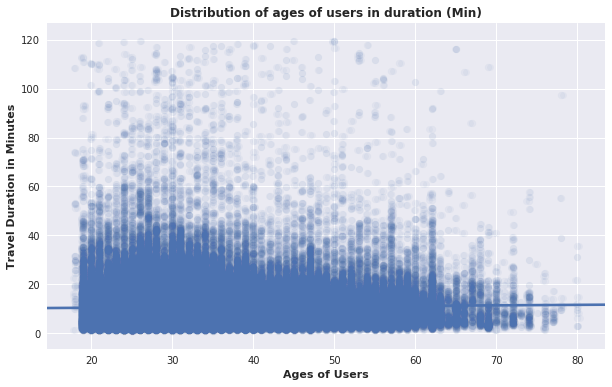

In [40]:
# Scatter plot and regplot
plt.figure(figsize = [10, 6]);
sb.regplot(data = df_clean, x = 'ages', y = 'duration_min', x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.scatter(data = df_clean, x = 'ages', y = 'duration_min', alpha=1/20);
plt.xlabel('Ages of Users', weight='bold')
plt.ylabel('Travel Duration in Minutes', weight='bold');
plt.title('Distribution of ages of users in duration (Min)', weight='bold');

> We can see from the scatterplot and also the regplot above that there is almost no any correlation between the two. 

> Next, it is would be very interesting to explore if subscribes of the company travels more than the just users or vice versa. Similarly, what is the distribution of the travel duration by gender of the users? Let's plot them first accordingly;

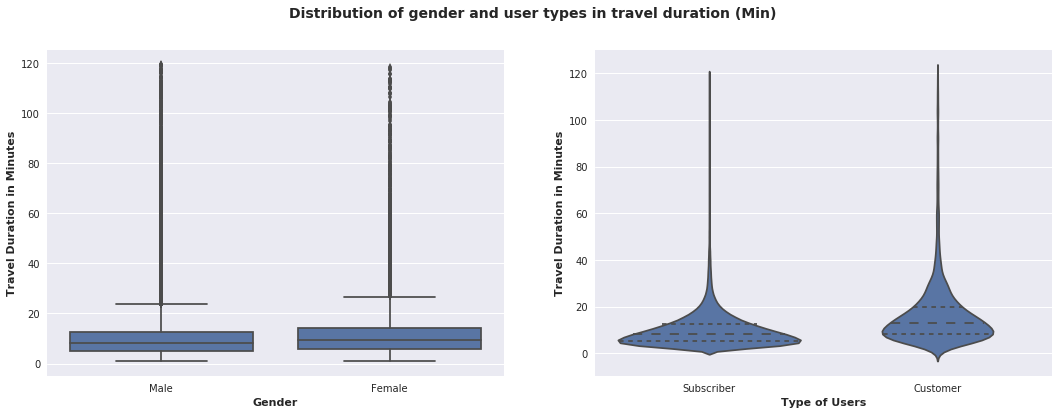

In [41]:
plt.figure(figsize = [18, 6])

# Setting the title of the joint plot
plt.suptitle('Distribution of gender and user types in travel duration (Min)', weight='bold', fontsize=14)

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.boxplot(data=df_clean, x='member_gender', y='duration_min', color=base_color);
plt.xlabel('Gender', weight='bold');
plt.ylabel('Travel Duration in Minutes', weight='bold');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
sb.violinplot(data=df_clean, x='user_type', y='duration_min', color=base_color, inner='quartile');
plt.xlabel('Type of Users', weight='bold');
plt.ylabel('Travel Duration in Minutes', weight='bold');

> As we can see from the 1st box plot above, there doesn't exist huge difference of travel durations between men and women. Whereas, there exists difference of travel durations between subscribers and non-subscribers. Non-subscribers have wider travel durations compared to subscribers of the company.

> Similarly, we can explore if there is an effect of age to become a subscriber of the company.

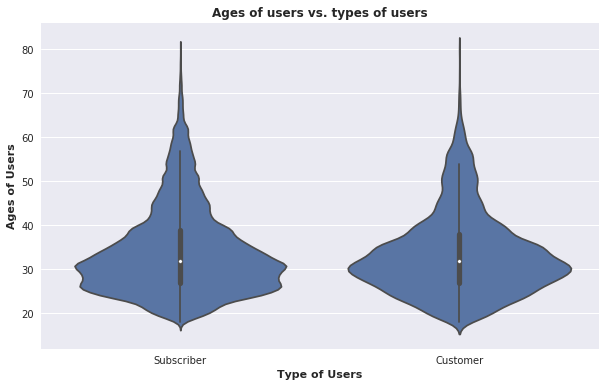

In [42]:
plt.figure(figsize = [10, 6])
sb.violinplot(data=df_clean, x='user_type', y='ages', color=base_color);
plt.xlabel('Type of Users', weight='bold');
plt.ylabel('Ages of Users', weight='bold');
plt.title('Ages of users vs. types of users', weight='bold');

> We  can clearly see from the graph above that ages of the most of the bike users vary between 20 and 40 no matter they have been subscribed to the company or not. Also, we can notice that the most of the users have 30. 

> Now, Let's see the day of the week effect between subscribers and non-subscribers. 

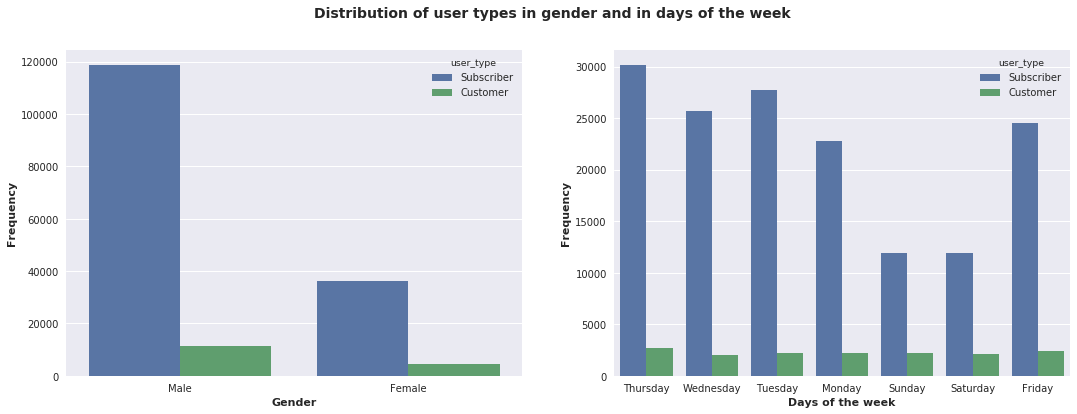

In [43]:
plt.figure(figsize = [18, 6])

# Setting the title of the joint plot
plt.suptitle('Distribution of user types in gender and in days of the week', weight='bold', fontsize=14)

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.countplot(data=df_clean, x='member_gender', hue='user_type');
plt.xlabel('Gender', weight='bold');
plt.ylabel('Frequency', weight='bold');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
sb.countplot(data=df_clean, x='start_day', hue='user_type');
plt.xlabel('Days of the week', weight='bold');
plt.ylabel('Frequency', weight='bold');

> As we can see in the 1st countplot that no matter they're male or female, the most of the users are subscribers of the of the company. In other words, we can aslo say that they subscribe to the company because probably they use bikes mostly to travel to work. While, in the parallel countplot, I observed that there is distribution of subscribers are way higer than the non-subscribers and the usage is very high on weekdays than weekends. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this section, I investigated the relationships between pairs of variables. I started by observing the correlations between non-categorical variables given in the dataset. For this exercise, I used the advantege of scatterplots. I have first explored that if there was any correlartion between travel duration and ages of the users. Using the scatterplot and also the regplot that I found that there was almost no any correlation between the two.

> Next, using a box plot , I found that there didn't exist that much difference in terms of travel durations between men and women. Whereas, there existed difference in terms of travel durations between subscribers and non-subscribers. Non-subscribers had wider travel durations compared to subscribers of the company.

> Furthermore, using a viloin plot I found that similarly as in the case of travel durations compared with ages above, the most of the subscribers are youngesters whereas non-subscribers are slightly older than subscribers.

> Finally, using a countplot I found that that no matter the users are male or female, the most of the them are subscribers of the of the company. In the parallel countplot, I observed that there was distribution of subscribers are way higer than the non-subscribers and they used them a lot on weekdays than weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There were indeed some interesting realtionships in this section. I was expecting to have a huge difference between men and women regarding their travel duration times. But, interestingly, they had almost similar duration of usage. 

> The next very interesting fact is I noticed that ages of the most of the bike users vary between 20 and 40 no matter they have been subscribed to the company or not. Also, we can notice that the most of the users have 30.

## Multivariate Exploration

> In this section we create plots of three or more variables to investigate the data even further. We can seek the answers of the questions e.g. what is the distribution the travel duration in weekdays and weekends between customers and subscribers? is there any correlation between average travel durations and ages of the users no matter they are subscribers on non-subscribers, male or female? etc.

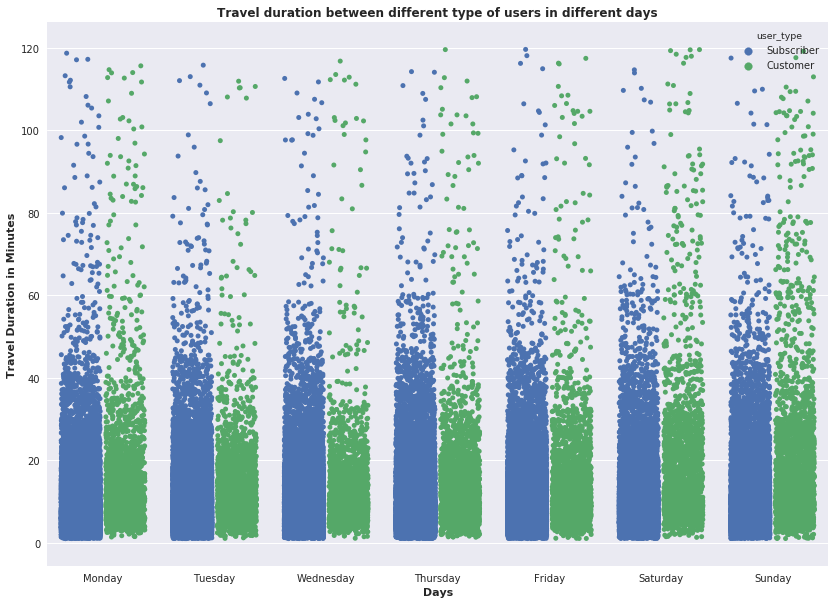

In [44]:
plt.figure(figsize = [14, 10])
sb.stripplot(data=df_clean, x='start_day', y='duration_min', hue='user_type', order=day_order, jitter=0.35, dodge=True);
plt.xlabel('Days', weight='bold');
plt.ylabel('Travel Duration in Minutes', weight='bold');
plt.title('Travel duration between different type of users in different days', weight='bold');

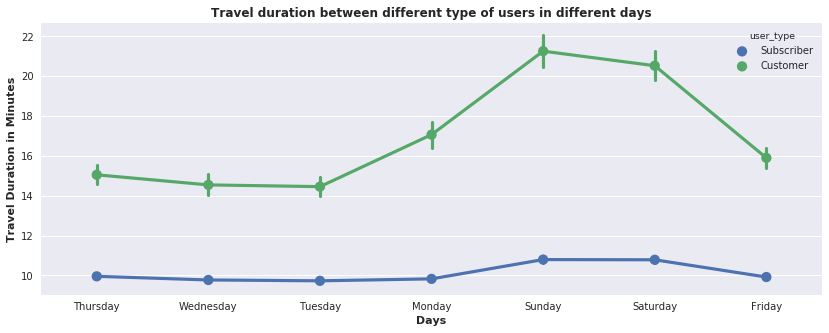

In [45]:
plt.figure(figsize = [14, 5])
sb.pointplot(data=df_clean, x='start_day', y='duration_min', hue='user_type');
plt.xlabel('Days', weight='bold');
plt.ylabel('Travel Duration in Minutes', weight='bold');
plt.title('Travel duration between different type of users in different days', weight='bold');

> Here we can see the different senario that the average travel durations of the non-subscribers have seen much larger than the average travel durations of the subscribers in the second plot. But looking at the actual plot of the entire dataset we see that this isn't true. Another interesting fact is that on weekends both group have more travel durations compared to weekdays. I guess this is due to the fact that they have to go to work during the weekdays and they have more time on weekends. 

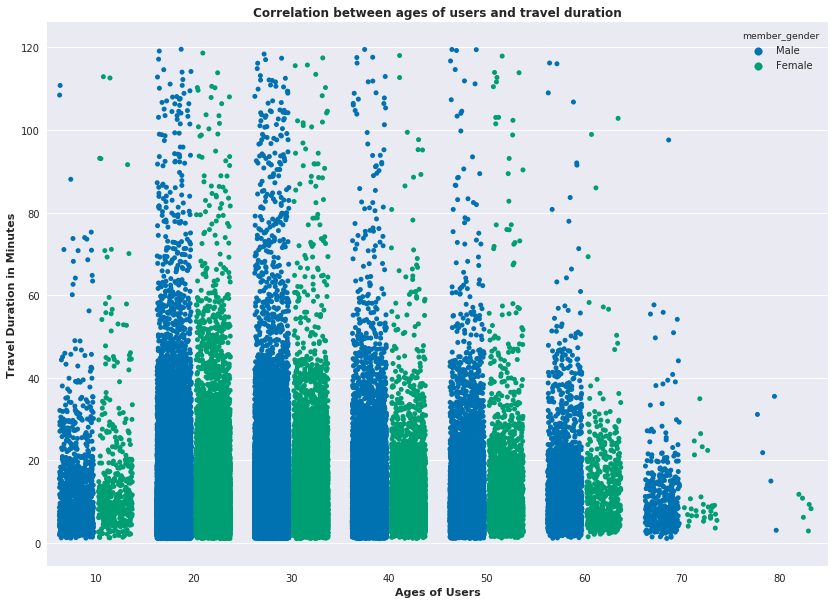

In [46]:
# Creating the age intervals
df_clean['age_intervals'] = ((df_clean['ages']//10)*10)

plt.figure(figsize = [14, 10])

sb.stripplot(data=df_clean, x='age_intervals', y='duration_min', hue='member_gender', palette='colorblind', jitter=0.35, dodge=True);
plt.title('Correlation between ages of users and travel duration', weight='bold');
plt.xlabel('Ages of Users', weight='bold');
plt.ylabel('Travel Duration in Minutes', weight='bold');

> We can see from the graph above that there exists correation between the ages of the users and the average travel duration. We can see rather slightly negative correlation after the age of 20 between the two. After the age of 20, younger people travelled more than the older people. Also, looking at the plot above, we see that that the longest travel durations correspond the age interval between 20 and 30. Travel duration starts decreasing after the age 20.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section, I dealt with plots os three or more variable. First, I observed that the average travel durations of the non-subscribers are almost the same with the subscribers. Moreover, I noticed that on weekends both group have more travel durations compared to weekdays. I guess this is due to the fact that they have to go to work during the weekdays and they have more time on weekends.

> Next I observed that we can see from the graph above that there exists correation between the ages of the users and the average travel duration. We can see rather slightly negative correlation after the age of 20 between the two. After the age of 20, younger people travelled more than the older people. Also, looking at the plot above, we see that that the longest travel durations correspond the age interval between 20 and 30. Travel duration starts decreasing after the age 20.

### Were there any interesting or surprising interactions between features?

> The first intersting fact could be that some plots might sometimes mislead. For example, we saw above that  the average travel durations of the non-subscribers are much larger than the average travel durations of the subscribers despite the fact that the number of subscribers way more that the number of non-subscribers would be misleading if we didn't plot the second plot for the entite dataset. 

> Another interesting fact is that on weekends both group have more travel durations compared to weekdays. This is because they are free on weekends and have to work on weekdays.

> Finally, I found very interesting that there is not much correation between the ages of the users and the average travel duration. I would expect that the youngesters have more passion to travel with a bike compared older people.

## Conclusions

> In the first section, I dealt with only univariate data exploration. Observing the data I have found very interesting facts and information. I will share these facts as follows:
   1. There are way more male users than female users and the most of the users are subscribers of the company. 
   2. As it was expected, the contribution of the gender among the subscribers and non-subscribers are similar as above i.e. more men than women have been using the bikes for their travelling.
   3. I have also observed that the frequency of the male subscribers and also the non-subscribers are dominant as well with almost 3 times difference between the two groups.
   5. The most of the bike users correspond to the age range between 20 and 40.
   6. As it is expected that the most frequent hour of the day is 5:00 pm and the least frequent is after midnight. his is probably due to the fact that everyone returned home from their offices. 
   7. Also, it should be noted that people used bikes 24 hours in a day.
   8. People have been used bikes more during the weekdays compared to weekends. 
   9. The most frequent day is Thursday with above 30000 uses. It must be noted that the given dataset contains only February as a month. Therfore, we can't check the distribution in each month.
> Concerning the unusulal points there were ages even above 120 or 140 and I found this unusual and there con't be ages like this one. I think this kind of date should be removed and hence hence I took the ages under 80 to make my analysis more reasonable. Furthermore, I needed to use logarithmic transformation to have better ideas.

> In the second section, I investigated the relationships between pairs of variables. I started by observing the correlations between non-categorical variables given in the dataset. For this exercise, I used the advantege of scatterplots. I have first explored that if there was any correlartion between travel duration and ages of the users. Using the scatterplot and also the regplot that I found that there was almost no any correlation between the two.

> Next, using a box plot , I found that there didn't exist that much difference in terms of travel durations between men and women. Whereas, there existed difference in terms of travel durations between subscribers and non-subscribers. Non-subscribers had wider travel durations compared to subscribers of the company.

> Furthermore, using a viloin plot I found that similarly as in the case of travel durations compared with ages above, the most of the subscribers are youngesters whereas non-subscribers are slightly older than subscribers.

> Next, using a countplot I found that that no matter the users are male or female, the most of the them are subscribers of the of the company. In the parallel countplot, I observed that there was distribution of subscribers are way higer than the non-subscribers and they used them a lot on weekdays than weekends.

> In the third and final section, I dealt with plots os three or more variable. First, I observed that the average travel durations of the non-subscribers are almost the same with the subscribers. Moreover, I noticed that on weekends both group have more travel durations compared to weekdays. I guess this is due to the fact that they have to go to work during the weekdays and they have more time on weekends.

> Finally, I observed that we can see from the graph above that there exists correation between the ages of the users and the average travel duration. We can see rather slightly negative correlation after the age of 20 between the two. After the age of 20, younger people travelled more than the older people. Also, looking at the plot above, we see that that the longest travel durations correspond the age interval between 20 and 30. Travel duration starts decreasing after the age 20.


In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Part_I_exploration.ipynb'])

0